# CSC 392 Final Proposal
***
For the final, I will be analyzing a csv file on Animal Survival Times based on 3 poisons and 4 forms of treatment
---
> For the "prerequisites" part, I will be answering basic questions such as:
-  The number of rows & columns
-  If there are consistant values for all observations
-  Statistical data (mean, mode, max, min) for categorical variables
-  Basic plots (histograms, bar graphs)


> > The main part of this project will dive deeper into the data
-  I will attempt to build scatterplots and visualize my data by looking at the dependent and independent variables
-  Is my data unimodal or multimodal?
-  I will identify clusters and build a decision tree
-  From this I will check if the clusters relate to my decision tree. I will then check if the levels of my dependent variables are equally represented.
---
Now we will analyze deeper even deeper

- The best decision tree for the dataset will be found using 3-fold cross-validation and the confidence interval will be determined from this (using the grid search module).
- I will build a ANN/MLP with the best cross-validated performance I could find.
- They will be compared to both a tree and a KNN to see if the model difference are statistic significant
- I will see which data structure performs best on the data set using regression (cross-validated R^2 score).

-  I hope to answer these questions and some more that will come up during my analysis.


<h1>Here are some basic stats on my dataset</h1>

<h1>Effect of Poisons & Treatments on Animal Survival Times</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plot

In [2]:
%matplotlib inline

In [3]:
poisons_df = pd.read_csv("poisons.csv")

In [4]:
poisons_df

,Unnamed: 0,time,poison,treat
0,1,0.31,1,A
1,2,0.45,1,A
2,3,0.46,1,A
3,4,0.43,1,A
4,5,0.36,2,A
5,6,0.29,2,A
6,7,0.40,2,A
7,8,0.23,2,A
8,9,0.22,3,A
9,10,0.21,3,A


In [5]:
poisons_df.describe()

,Unnamed: 0,time,poison
count,48.00,48.000000,48.000000
mean,24.50,0.479375,2.000000
std,14.00,0.252859,0.825137
min,1.00,0.180000,1.000000
25%,12.75,0.300000,1.000000
50%,24.50,0.400000,2.000000
75%,36.25,0.622500,3.000000
max,48.00,1.240000,3.000000


In [6]:
poisons_df.drop(['Unnamed: 0'], axis=1)

,time,poison,treat
0,0.31,1,A
1,0.45,1,A
2,0.46,1,A
3,0.43,1,A
4,0.36,2,A
5,0.29,2,A
6,0.40,2,A
7,0.23,2,A
8,0.22,3,A
9,0.21,3,A


In [7]:
columns_rows = poisons_df.shape

In [8]:
print("The number of rows is: {x}".format(x = columns_rows[0]))

The number of rows is: 48


In [9]:
print("The number of columns is: {x}".format(x = columns_rows[1]))

The number of columns is: 4


<h4>Here are some basic stats on the mean, mode, min, & max of the columns:</h4>

In [10]:
poisons_df['time'].mode()

0    0.23
1    0.31
2    0.45
dtype: float64

In [11]:
poisons_df['poison'].mode()

0    1
1    2
2    3
dtype: int64

In [12]:
poisons_df['treat'].mode()

0    A
1    B
2    C
3    D
dtype: object

In [13]:
poisons_df['time'].mean()

0.4793749999999999

In [14]:
poisons_df['poison'].mean()

2.0

In [15]:
poisons_df['time'].max()

1.24

In [16]:
poisons_df['poison'].max()

3

In [17]:
poisons_df['time'].min()

0.17999999999999999

In [18]:
poisons_df['poison'].min()

1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a7bef28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f7f0f98>]], dtype=object)

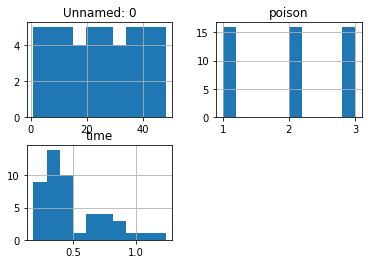

In [19]:
poisons_df.hist()

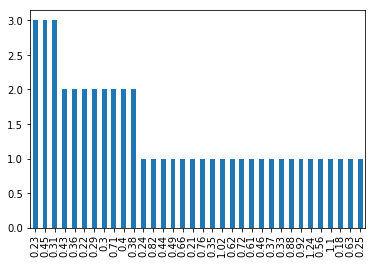

In [20]:
poisons_df['time'].value_counts().plot(kind="bar")

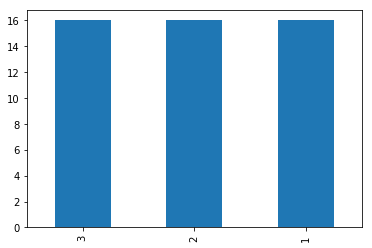

In [21]:
poisons_df['poison'].value_counts().plot(kind="bar")

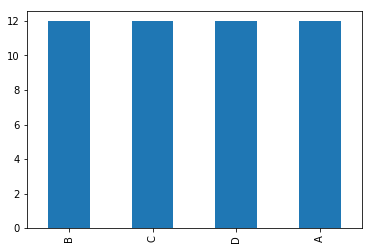

In [22]:
poisons_df['treat'].value_counts().plot(kind="bar")

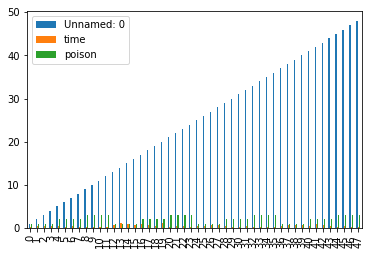

In [23]:
poisons_df.plot(kind='bar')